In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import tranformations

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

import joblib

In [83]:
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

In [ ]:
print(df_2015.shape)
df_2015.head()

In [ ]:
print(df_2016.shape)
df_2016.head()

In [ ]:
print(df_2017.shape)
df_2017.head()

In [ ]:
print(df_2018.shape)
df_2018.head()

In [ ]:
print(df_2019.shape)
df_2019.head()

In [ ]:
print("DataFrame 2015")
print(df_2015.describe())


In [ ]:
print("DataFrame 2016")
print(df_2016.describe())



In [ ]:
print("DataFrame 2017")
print(df_2017.describe())


In [ ]:

print("DataFrame 2018")
print(df_2018.describe())



In [ ]:
print("DataFrame 2019")
print(df_2019.describe())

Podemos ver que las columnas en común para todos los conjuntos de datos son: Country, happiness score, GDP per capita, Life expectancy, freedom, generosity, and trust /government corruption.

Las columnas que vamos a eliminar antes de fusionar son: Region, Standard Error que estan presentes en el conjunto de datos de 2015, Family and Dystopia residual que no estan presentes en el df de 2018 y 2019, whisker high and low presentes en el conjunto de datos de 2017, social support en los conjuntos de datos de 2018 y 2019, Lower confidence interval, and Upper confidence interval presentes en el conjunto de datos del 2016.

In [ ]:
import seaborn as sns

dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019]
titles = ["DataFrame 1", "DataFrame 2", "DataFrame 3", "DataFrame 4", "DataFrame 5"]

plt.figure(figsize=(20, 10))

for i, df in enumerate(dataframes):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df, kde=True, ax=plt.gca())
    plt.title(titles[i])

plt.tight_layout()
plt.show()


In [ ]:
dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019]
titles = ["DataFrame 1", "DataFrame 2", "DataFrame 3", "DataFrame 4", "DataFrame 5"]

plt.figure(figsize=(20, 10))

for i, df in enumerate(dataframes):
    ax = plt.subplot(2, 3, i + 1)  # Crear un nuevo subplot para cada DataFrame
    for column in df.columns:
        sns.histplot(df[column], kde=True, ax=ax, label=column)  # Pasar el eje creado
    ax.set_title(titles[i])  # Establecer el título
    ax.legend()  # Mostrar leyenda si hay múltiples columnas

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))

for i, (df, title) in enumerate(zip(dataframes, titles)):
    ax = plt.subplot(2, 3, i + 1)  
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis", ax=ax) 
    ax.set_title(title) 

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))

for i, (df, title) in enumerate(zip(dataframes, titles)):
    ax = plt.subplot(2, 3, i + 1)  
    sns.boxplot(data=df, ax=ax) 
    ax.set_title(title) 

plt.tight_layout()
plt.show()


Eliminacion

In [84]:
df_2015.drop(columns=['Region', 'Standard Error', 'Family', 'Dystopia Residual'], inplace=True)
df_2016.drop(columns=['Region', 'Family', 'Dystopia Residual', 'Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)
df_2017.drop(columns=['Whisker.high', 'Family','Whisker.low', 'Dystopia.Residual'], inplace=True)
df_2018.drop(columns=['Social support'], inplace=True)
df_2019.drop(columns=['Social support'], inplace=True)

Renombrar las columnas para que todos los dfs queden igual

In [85]:
n2015_2016 = {'Economy (GDP per Capita)': 'GDP per capita',
         'Trust (Government Corruption)': 'Government Corruption'}
n2017 = {'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score', 
         'Economy..GDP.per.Capita.': 'GDP per capita', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
         'Trust..Government.Corruption.': 'Government Corruption'}
n2018_2019 = {'Overall rank': 'Happiness Rank', 'Country or region': 'Country', 'Score': 'Happiness Score',
         'Healthy life expectancy' : 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom', 
         'Perceptions of corruption': 'Government Corruption'}

df_2015 = df_2015.rename(columns=n2015_2016)
df_2016 = df_2016.rename(columns=n2015_2016)
df_2017 = df_2017.rename(columns=n2017)
df_2018 = df_2018.rename(columns=n2018_2019)
df_2019 = df_2019.rename(columns=n2018_2019)

dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019]
titles = ["df_2015", "df_2016", "df_2017", "df_2018", "df_2019"]

for df, title in zip(dataframes, titles):
    print(f"Column names in {title} after renaming:")
    print(df.columns)
    print("\n")


Column names in df_2015 after renaming:
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Government Corruption',
       'Generosity'],
      dtype='object')


Column names in df_2016 after renaming:
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Government Corruption',
       'Generosity'],
      dtype='object')


Column names in df_2017 after renaming:
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Government Corruption'],
      dtype='object')


Column names in df_2018 after renaming:
Index(['Happiness Rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Government Corruption'],
      dtype='object')


Column names in df_2019 after renaming:
Index(['Happiness Rank', 'Country', 'Hap

Ordenar las columnas de los dfs para la organizacion

In [86]:
column_order = ['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
                'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Government Corruption']
df_2015 = df_2015[column_order]
df_2016 = df_2016[column_order]
df_2017 = df_2017[column_order]
df_2018 = df_2018[column_order]
df_2019 = df_2019[column_order]

dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019]
titles = ["df_2015", "df_2016", "df_2017", "df_2018", "df_2019"]

for df, title in zip(dataframes, titles):
    print(f"Column names in {title} after renaming:")
    print(df.columns)
    print("\n")
    



Column names in df_2015 after renaming:
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Government Corruption'],
      dtype='object')


Column names in df_2016 after renaming:
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Government Corruption'],
      dtype='object')


Column names in df_2017 after renaming:
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Government Corruption'],
      dtype='object')


Column names in df_2018 after renaming:
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Government Corruption'],
      dtype='object')


Column names in df_2019 after renaming:
Index(['Country', 'Happiness Rank', 'Hap

concatenación (concatenation) o apilado (stacking), apilándolos verticalmente.

In [87]:
happy = pd.concat(dataframes, ignore_index=True)

print(happy.shape)
happy.head()

(782, 8)


,Country,Happiness Rank,Happiness Score,GDP per capita,Health (Life Expectancy),Freedom,Generosity,Government Corruption
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630,0.14145
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139,0.48357
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699,0.36503
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811,0.32957


In [17]:
happy.to_csv('happy.csv', index = False)

In [88]:
unique_counts = happy.nunique()
total_unique_values = unique_counts.sum()

print("Conteo de valores únicos por columna:")
print(unique_counts)
print("\nSuma total de valores únicos en el DataFrame:")
print(total_unique_values)

Conteo de valores únicos por columna:
Country                     170
Happiness Rank              158
Happiness Score             716
GDP per capita              742
Health (Life Expectancy)    705
Freedom                     697
Generosity                  664
Government Corruption       635
dtype: int64

Suma total de valores únicos en el DataFrame:
4487


In [89]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   782 non-null    object 
 1   Happiness Rank            782 non-null    int64  
 2   Happiness Score           782 non-null    float64
 3   GDP per capita            782 non-null    float64
 4   Health (Life Expectancy)  782 non-null    float64
 5   Freedom                   782 non-null    float64
 6   Generosity                782 non-null    float64
 7   Government Corruption     781 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 49.0+ KB


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(happy.isna(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes")
plt.show()


Como podemos ver, hay un valor nulo en el conjunto de datos

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(happy['Government Corruption'], kde=True)
plt.title('Distribución de Government Corruption')
plt.show()

Como los datos estan sesgados a la izquierda, utilizare la mediana para reemplazar el valor faltante ya que es más robusta frente a outliers y no se ve tan afectada por la asimetría en la distribución como la media.

In [90]:
median_value = happy['Government Corruption'].median()
happy['Government Corruption'] = happy['Government Corruption'].fillna(median_value)

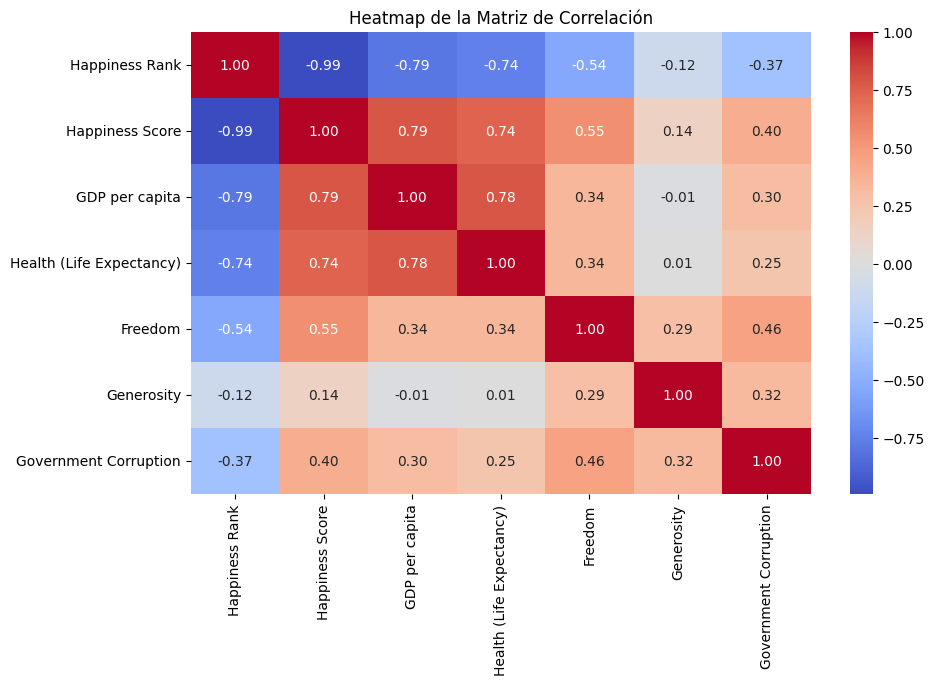

In [40]:
numeric_happy = happy.select_dtypes(include=['number'])

corr_matrix = numeric_happy.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

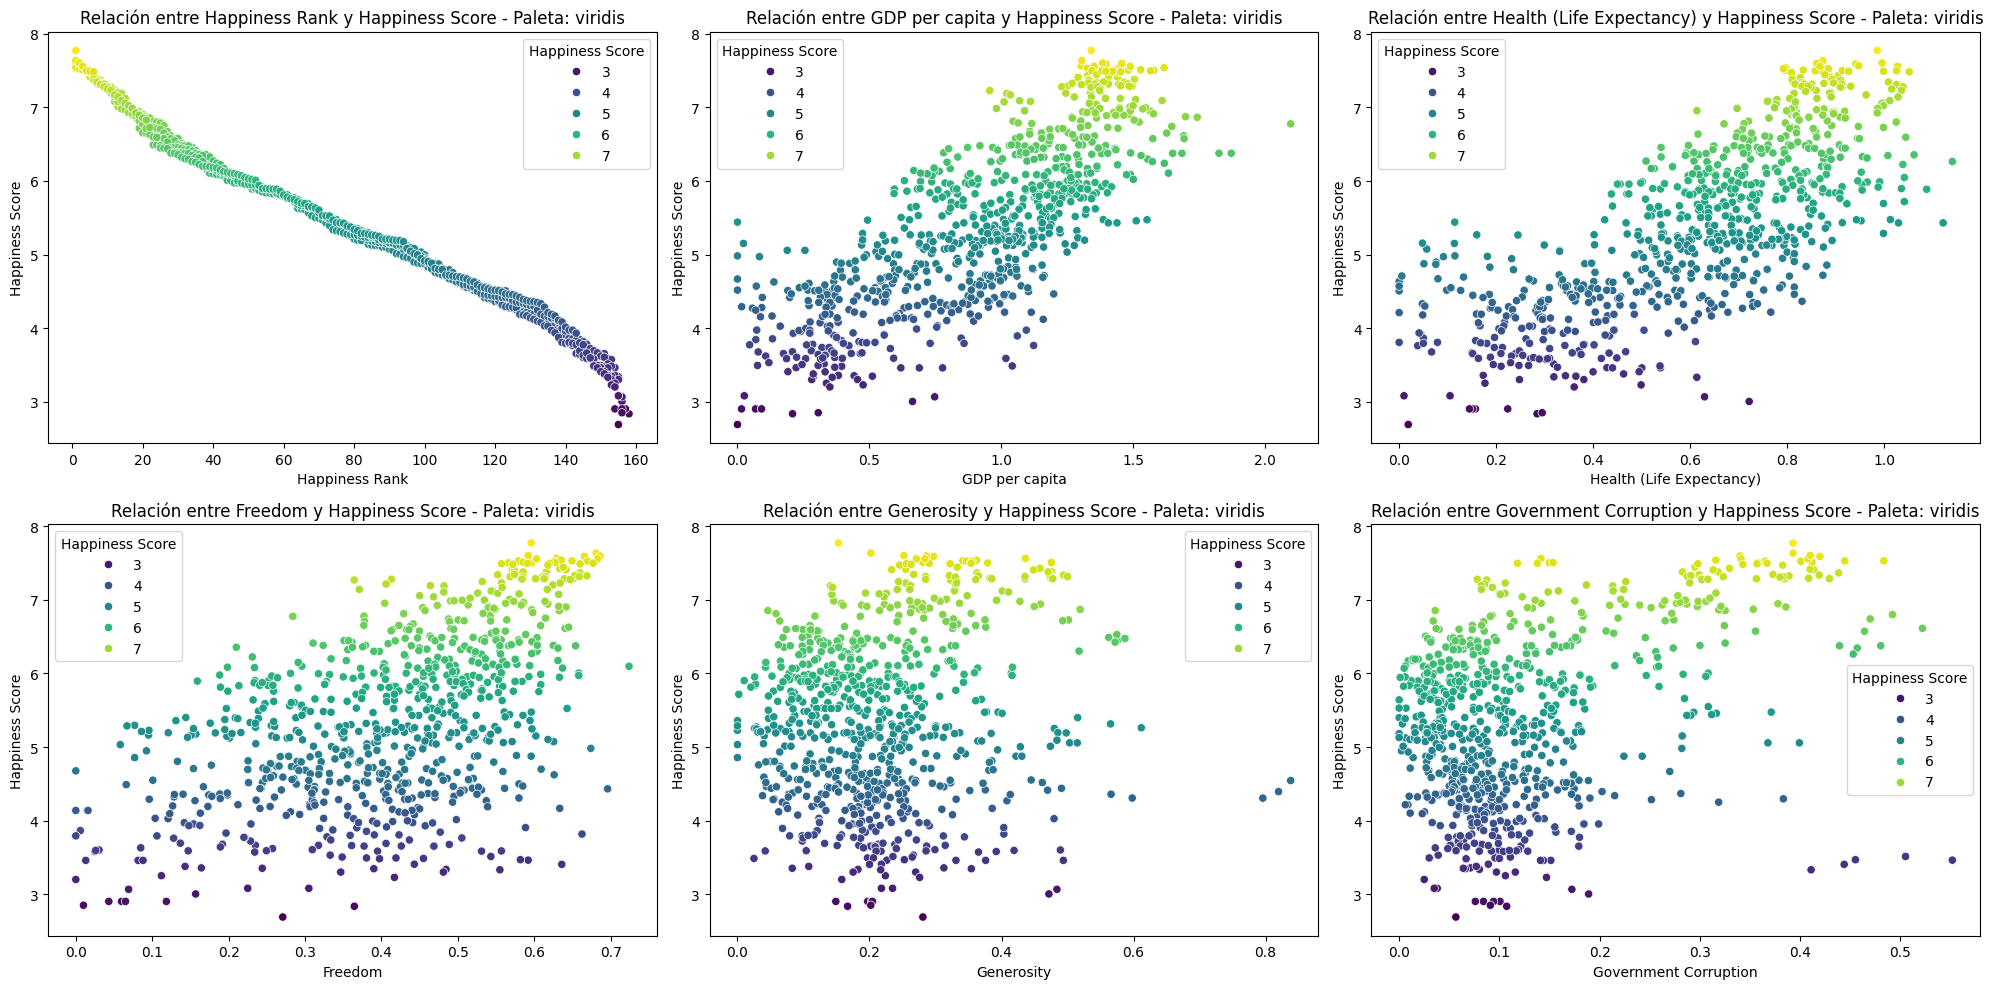

In [91]:
numeric_happy = happy.select_dtypes(include=['number'])

target_column = 'Happiness Score'
numeric_columns = numeric_happy.columns.drop(target_column)

paletas = ['viridis']

for palette in paletas:
    plt.figure(figsize=(20, 10))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(2, 3, i)
        sns.scatterplot(data=happy, x=column, y=target_column, hue=target_column, palette=palette)
        plt.title(f'Relación entre {column} y {target_column} - Paleta: {palette}')
    plt.tight_layout()
    plt.show()

Se puede notar que la columna Happiness Rank es inversamente proporcional a la Happiness Score, y es lógico porque un país con una puntuacion de felicidad más alta tendrá un rango más alto y, es decir, un valor más pequeño para esta variable. Sera eliminada ya que es como si tuvieramos los mismos datos de Happiness Score y podria darnos probelmas de multicolinealidad.

Por otro lado, se observa que tanto la columna Government Corruption como la columna Generosity parecen tener una relación bastante débil con la  columna Happiness Score, mientras que las demás variables parecen tener una relación lineal esta.

In [92]:
happy = happy.drop(columns=['Happiness Rank'])


In [93]:
happy['Continent'] = happy['Country'].apply(tranformations.country_continent)
happy.head()

,Country,Happiness Score,GDP per capita,Health (Life Expectancy),Freedom,Generosity,Government Corruption,Continent
0,Switzerland,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,Europe
1,Iceland,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,Europe
2,Denmark,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,Europe
3,Norway,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,Europe
4,Canada,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,North America


In [94]:
happy['Continent'].value_counts()

Africa           221
Europe           215
Asia             215
North America     69
South America     52
Oceania           10
Name: Continent, dtype: int64

In [95]:
happy = pd.get_dummies(happy, columns=['Continent'], drop_first=False)
happy.head()

,Country,Happiness Score,GDP per capita,Health (Life Expectancy),Freedom,Generosity,Government Corruption,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,Switzerland,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,0,0,1,0,0,0
1,Iceland,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,0,0,1,0,0,0
2,Denmark,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,0,0,1,0,0,0
3,Norway,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,0,0,1,0,0,0
4,Canada,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,0,0,0,1,0,0


In [96]:
happy = happy.drop(columns=['Country'])
happy.head()

,Happiness Score,GDP per capita,Health (Life Expectancy),Freedom,Generosity,Government Corruption,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,0,0,1,0,0,0
1,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,0,0,1,0,0,0
2,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,0,0,1,0,0,0
3,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,0,0,1,0,0,0
4,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,0,0,0,1,0,0


In [97]:
print(happy.shape)

(782, 12)


#Modelo

In [20]:
happy = pd.read_csv("happy.csv")

Separar Características (Features) y Variable Objetivo (Target):

In [98]:
X = happy.drop('Happiness Score', axis = 1) #características/columnas/variables que se usarán para predecir
y = happy['Happiness Score']  # Variable objetivo

X_train = dimensiones del conjunto de características de entrenamiento.\\
X_test = dimensiones del conjunto de características de prueba.\\
y_train = las dimensiones del conjunto de la variable objetivo de entrenamiento.\\
y_test = las dimensiones del conjunto de la variable objetivo de prueba.\\

test_size=0.3 indica que el 30% de los datos se utilizarán para el conjunto de prueba, y el 70% restante se utilizarán para el conjunto de entrenamiento.

random_state=42 es la división y usaremos el mismo número siempre para que de la misma división.

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [153]:

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(547, 11) (235, 11) (547,) (235,)


In [154]:
X_test.head()

,GDP per capita,Health (Life Expectancy),Freedom,Generosity,Government Corruption,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
720,0.813000,0.604000,0.457000,0.370000,0.167000,0,1,0,0,0,0
758,0.820000,0.739000,0.178000,0.187000,0.010000,0,0,1,0,0,0
363,1.281778,0.547349,0.373783,0.052264,0.032963,0,0,1,0,0,0
458,0.305809,0.375223,0.189197,0.208733,0.067232,1,0,0,0,0,0
371,1.217684,0.685158,0.457004,0.133520,0.004388,0,0,1,0,0,0


Hare 3 modelos finales para comparar cual seria el mejor: Modelo Lineal, RandomForestRegressor y GradientBoostingRegressor

MODELO LINEAL

In [149]:
lineal = LinearRegression()

lineal.fit(X_train, y_train) 

prediction_l = lineal.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, prediction_l))
print("R-squared:", r2_score(y_test, prediction_l))

Mean Squared Error: 0.27724023569899364
R-squared: 0.8023612064062314


MODELO RandomForestRegressor

In [179]:
random = RandomForestRegressor(n_estimators=151, random_state=40)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.1997868342354579
R-squared: 0.8440456825682517


MODELO GradientBoostingRegressor

In [198]:
boost = GradientBoostingRegressor(random_state=40)
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.21913817320672882
R-squared: 0.8289399581485025


In [199]:
joblib.dump(random, 'RandomForestRegressor.pkl')

['RandomForestRegressor.pkl']